# Testing William fractal strategy

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import datetime

import ta, pickle, json, time
import mplfinance as fplt

# Import

In [34]:
# Create VWAP function
def vwap(df, n):
    tp = (df.volume * df.close).rolling(window = n).sum()
    v = df.volume.rolling(window = n).sum()
    df[f"vwap{n}"] =  tp / v 
    return df

for n in [20, 50, 100]:
    df = vwap(df, n)
df

,timestamp,open,high,low,close,volume,close_time,ema10,ema20,ema50,ema100,vwap20,vwap50,vwap100
Date,,,,,,,,,,,,,,
2020-07-11 22:17:00,2020-07-11 22:17:00,9226.00,9226.00,9223.30,9224.20,8.967077,1594505879999,9224.200000,9224.200000,9224.200000,9224.200000,NaN,NaN,NaN
2020-07-11 22:18:00,2020-07-11 22:18:00,9224.21,9225.00,9223.02,9223.80,11.122493,1594505939999,9224.000000,9224.000000,9224.000000,9224.000000,NaN,NaN,NaN
2020-07-11 22:19:00,2020-07-11 22:19:00,9223.78,9226.46,9223.05,9225.99,14.178658,1594505999999,9224.663333,9224.663333,9224.663333,9224.663333,NaN,NaN,NaN
2020-07-11 22:20:00,2020-07-11 22:20:00,9225.99,9232.06,9225.99,9231.96,53.251515,1594506059999,9226.487500,9226.487500,9226.487500,9226.487500,NaN,NaN,NaN
2020-07-11 22:21:00,2020-07-11 22:21:00,9231.96,9235.00,9231.96,9235.00,22.051639,1594506119999,9228.190000,9228.190000,9228.190000,9228.190000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-11 22:13:00,2021-07-11 22:13:00,34464.07,34499.00,34457.49,34462.99,57.726496,1626041639999,34510.195000,34508.103000,34450.201800,34171.675900,34528.568249,34466.943730,34344.709657
2021-07-11 22:14:00,2021-07-11 22:14:00,34462.98,34478.60,34448.99,34451.15,33.589879,1626041699999,34502.295000,34507.281500,34455.760400,34176.711700,34527.770380,34471.164504,34346.241173
2021-07-11 22:15:00,2021-07-11 22:15:00,34451.14,34451.98,34403.22,34424.54,115.045592,1626041759999,34490.504000,34505.259000,34460.725200,34181.754600,34520.955659,34472.778028,34348.204285


In [33]:
def ema(df, windows=[20]):
    emas = []
    for x in windows:
        emas.append(
            ta.trend.sma_indicator(close=df.close, window=x, fillna=True)
        )
    return emas

df = pd.read_csv("data 1 year/BTCUSDT-1m-data.csv")
df["Date"] = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S')
df['ema10'] = ta.trend.sma_indicator(close=df.close, window=10, fillna=True)
df['ema20'], df['ema50'], df['ema100'] = ema(df, [20, 50, 100])
df = df.drop(["quote_av", "trades", "tb_base_av", "tb_quote_av", "ignore"], axis=1)
df = df.set_index("Date")
df

,timestamp,open,high,low,close,volume,close_time,ema10,ema20,ema50,ema100
Date,,,,,,,,,,,
2020-07-11 22:17:00,2020-07-11 22:17:00,9226.00,9226.00,9223.30,9224.20,8.967077,1594505879999,9224.200000,9224.200000,9224.200000,9224.200000
2020-07-11 22:18:00,2020-07-11 22:18:00,9224.21,9225.00,9223.02,9223.80,11.122493,1594505939999,9224.000000,9224.000000,9224.000000,9224.000000
2020-07-11 22:19:00,2020-07-11 22:19:00,9223.78,9226.46,9223.05,9225.99,14.178658,1594505999999,9224.663333,9224.663333,9224.663333,9224.663333
2020-07-11 22:20:00,2020-07-11 22:20:00,9225.99,9232.06,9225.99,9231.96,53.251515,1594506059999,9226.487500,9226.487500,9226.487500,9226.487500
2020-07-11 22:21:00,2020-07-11 22:21:00,9231.96,9235.00,9231.96,9235.00,22.051639,1594506119999,9228.190000,9228.190000,9228.190000,9228.190000
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-11 22:13:00,2021-07-11 22:13:00,34464.07,34499.00,34457.49,34462.99,57.726496,1626041639999,34510.195000,34508.103000,34450.201800,34171.675900
2021-07-11 22:14:00,2021-07-11 22:14:00,34462.98,34478.60,34448.99,34451.15,33.589879,1626041699999,34502.295000,34507.281500,34455.760400,34176.711700
2021-07-11 22:15:00,2021-07-11 22:15:00,34451.14,34451.98,34403.22,34424.54,115.045592,1626041759999,34490.504000,34505.259000,34460.725200,34181.754600


In [107]:
trades = pd.read_csv("data 1 year/trades_adapt.csv")
trades

,i,timestamp,Action,Start,End,Benef,Duration
0,41,2020-07-11 22:56:00,SELL,9218.46,9222.677135,-4.217135,6
1,46,2020-07-11 23:01:00,SELL,9218.39,9222.292065,-3.902065,1
2,83,2020-07-11 23:38:00,BUY,9239.28,9254.287386,15.007386,36
3,402,2020-07-12 04:57:00,SELL,9269.11,9273.528564,-4.418564,1
4,419,2020-07-12 05:14:00,SELL,9262.16,9271.736135,-9.576135,22
...,...,...,...,...,...,...,...
8579,523578,2021-07-11 04:26:00,SELL,33312.83,33462.672779,-149.842779,22
8580,523728,2021-07-11 06:56:00,SELL,33457.79,33520.048921,-62.258921,7
8581,523731,2021-07-11 06:59:00,SELL,33441.33,33516.240536,-74.910536,4
8582,524509,2021-07-11 19:57:00,SELL,33894.57,33918.892172,-24.322172,3


# Plot finance

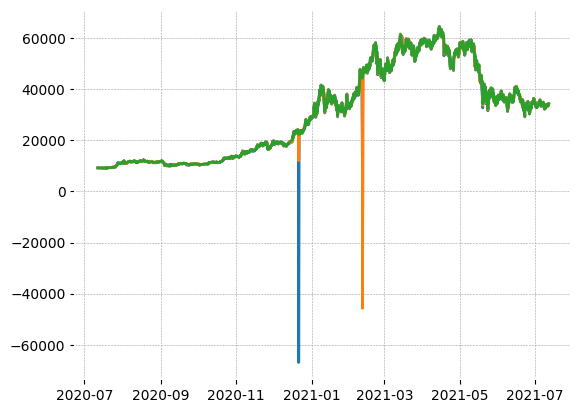

In [38]:
plt.plot(df.loc[:, ["vwap20"]])
plt.plot(df.loc[:, ["vwap50"]])
plt.plot(df.loc[:, ["vwap100"]])

In [39]:
for i, timestamp, Action, Start, End, Benef, Duration in trades.values[25:50]:
    extra_plot = fplt.make_addplot(df[i-30:i].loc[:, ["vwap20", "vwap50", "vwap100"]])
    fplt.plot(
        df[i-30:i],
        addplot=extra_plot,
        type='candle',
        style='charles',
        title='BTC USDT',
        ylabel='Price',
        volume=True
    )
    print(i)
    print(timestamp)
    print(Duration)
    print(Action)
    print(Benef)
    
    input("Enter : ")
    clear_output()

# Analyse

In [214]:
trades = pd.read_csv("data 1 year/trades_adapt2.csv")
trades.Benef.sum() / len(trades)

7.991879382307978

In [181]:
trades = pd.read_csv("trades_adapt2.csv")
trades.Benef.sum() / len(trades)

25.43857679654374

In [90]:
profit = []
loss = []
rang = []
for i in range(12):
    if i == 0:
        inf = 0
    else:
        inf = 2 ** (i-1)
    sup = 2 ** i
    rang.append(f"{inf} - {sup}")
    profit.append(trades[(inf * 1.5 < trades.Benef) & (trades.Benef < sup * 1.5)].Benef.count())
    loss.append(trades[(inf < trades.Benef) & (trades.Benef < sup)].Benef.count())

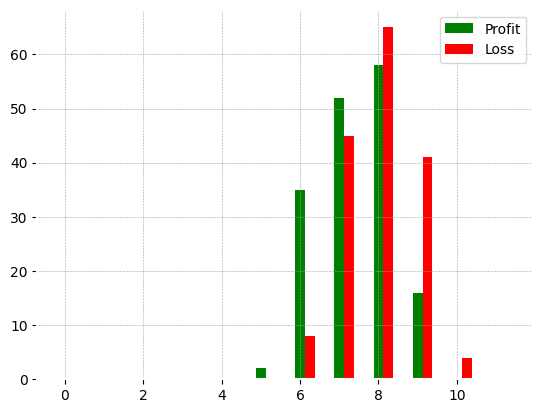

In [91]:
X = np.arange(len(profit))
plt.bar(X, profit, color="g", label="Profit", width = 0.25)
plt.bar(X+0.25, loss, color="r", label="Loss", width = 0.25)
plt.legend()


In [215]:
profit = []
loss = []
rang = []
for i in range(140):
    inf = i/10_000
    sup = (i + 1)/10_000
    rang.append(f"{inf} - {sup}")
    profit.append(trades[(inf*1.5 < trades.Benef/trades.Start) & 
                         (trades.Benef/trades.Start < sup*1.5)].Benef.count())
    loss.append(trades[(inf < - trades.Benef/trades.Start) & 
                       (- trades.Benef/trades.Start < sup)].Benef.count())

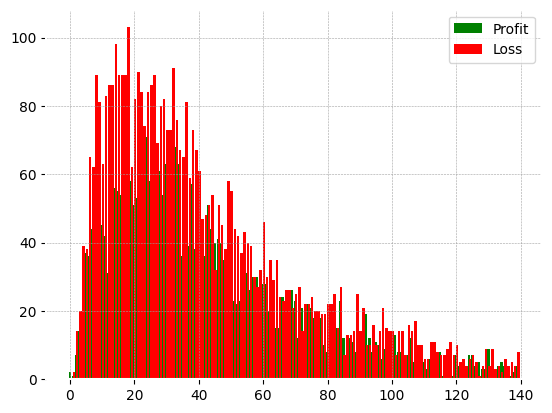

In [213]:
X = np.arange(len(profit))
# plt.figure(figsize=(50, 10))
plt.bar(X, profit, color="g", label="Profit")
plt.bar(X+0.25, loss, color="r", label="Loss")
plt.legend()

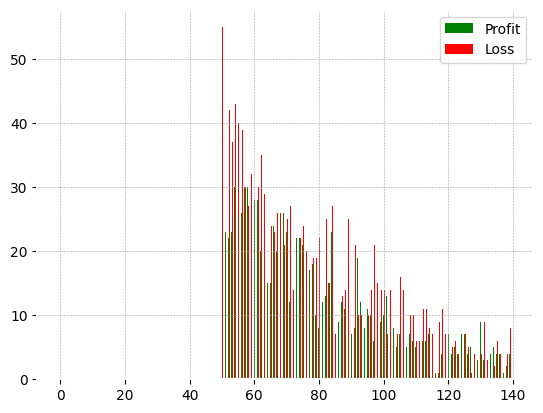

In [216]:
X = np.arange(len(profit))
plt.bar(X, profit, color="g", label="Profit", width = 0.25)
plt.bar(X+0.25, loss, color="r", label="Loss", width = 0.25)
plt.legend()